---
title: "Data Visualization Basics: Notebook"
navtitle: "Data Viz Basics (NB)"
subtitle: "Code examples of common graphs and plots"
description: "Matplotlib, seaborn, and plotly exampls of bar, box, scatter plots, and more."
format:
  html:
    page-layout: full
    title-block-banner: true
---

The tips dataset is a built-in example dataset within the Seaborn library, commonly used for demonstrating data visualization concepts. It contains information about restaurant tips, including variables such as:


- **total_bill**: The total bill amount in dollars.
- **tip**: The tip amount in dollars.
- **sex**: The gender of the person who paid the bill (Male/Female).
- **smoker**: Whether the person was a smoker (Yes/No).
- **day**: The day of the week (Thur, Fri, Sat, Sun).
- **time**: The time of day (Lunch/Dinner).
- **size**: The size of the party.

Note, some packages and calls take a 2D df, others require 1D data or even aggregate data.

In [1]:
#| include: false
# Global plot settings (hidden from learners)

import plotly.io as pio
pio.renderers.default = "png"  # static images, faster rendering

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
## Setup and Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Load built-in tips dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Visualizations Requirements

Visuals expect a number or range of variables and ofter require a certain type of varible to be of most use. Let's take a quick tour of the dataset before jumping in. 

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


We see 244 rows, with no missing values.


- Float columns: total_bill, tip
- int64 columns: size
- Category columns: sex, smoker, day, time

## Histogram
Histograms show distribution of a numerical variable.

Note: ';' at the end of a python statement suppress returned values-this is used in several below examples to focus on the visual.

### Matplotlib

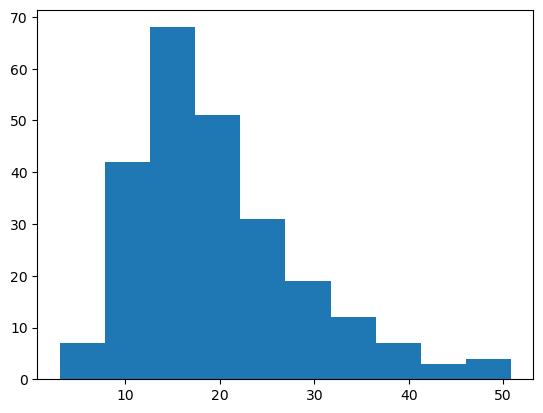

In [6]:
plt.hist(tips['total_bill']);

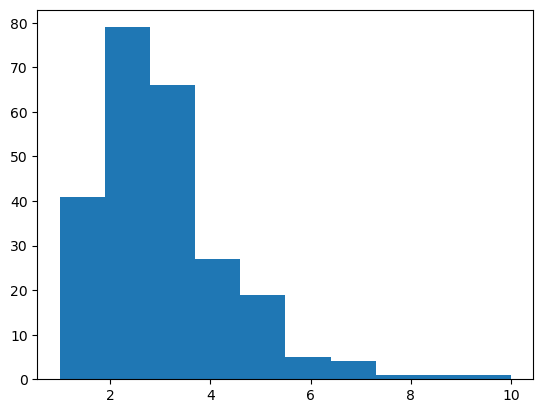

In [7]:
plt.hist(tips['tip']);

### Seaborn

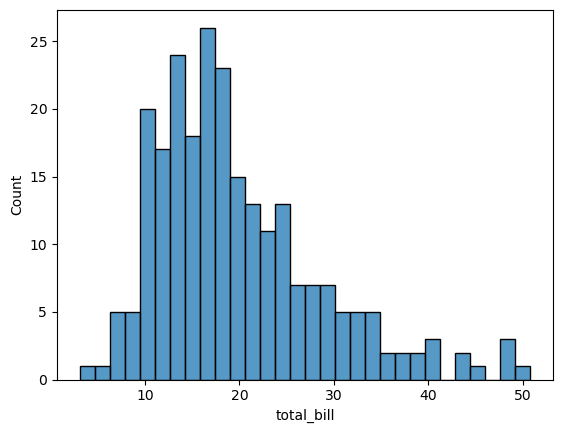

In [8]:
sns.histplot(tips['total_bill'], bins=30);

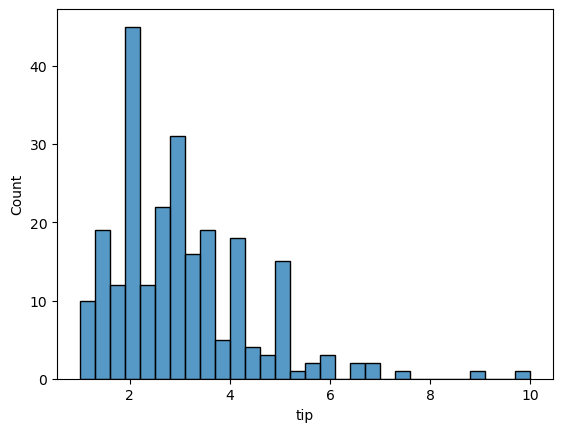

In [9]:
sns.histplot(tips['tip'], bins=30);

### Plotly

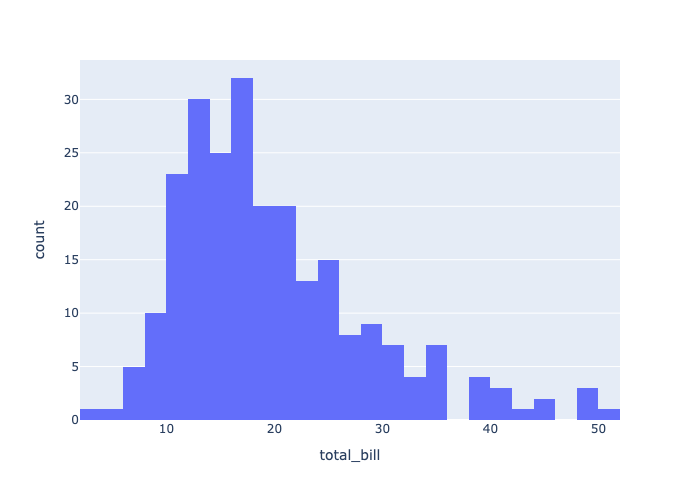

In [10]:
px.histogram(tips, x='total_bill')

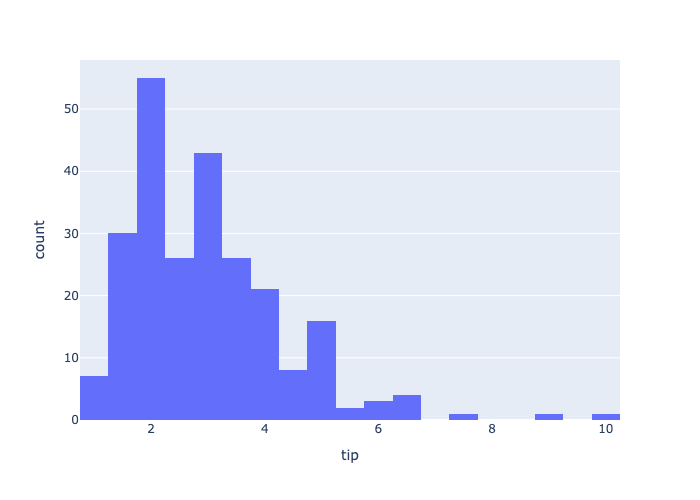

In [11]:
px.histogram(tips, x='tip')

## Bar Chart
Bar plots show aggregate values by category.

### Matplotlib

<BarContainer object of 244 artists>

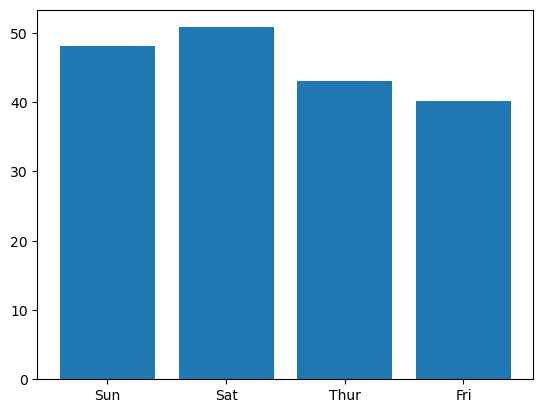

In [12]:
plt.bar(tips['day'], tips['total_bill'])

### Seaborn

<Axes: xlabel='day', ylabel='total_bill'>

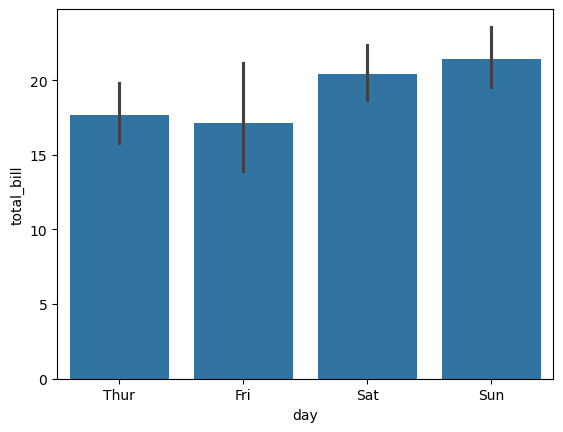

In [13]:
sns.barplot(x='day', y='total_bill', data=tips)

### Plotly

In [14]:
# Aggregate data for this plot
agg = tips.groupby("day", as_index=False)["total_bill"].mean()
agg

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


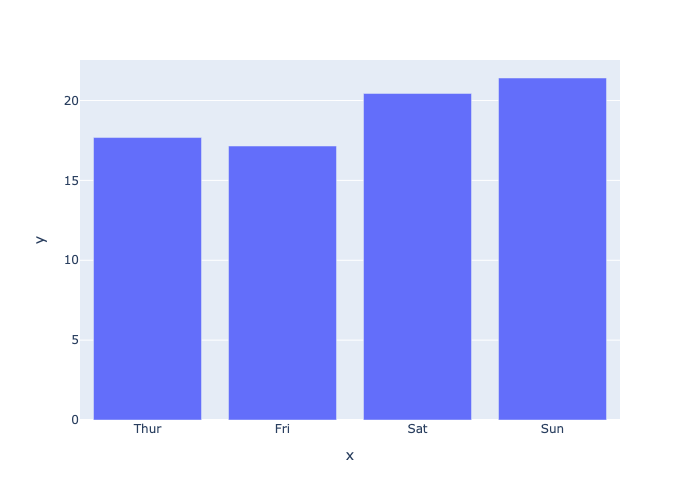

In [15]:
px.bar(x=agg['day'], y=agg['total_bill'])

<div class="custom-callout tux-tinker">
  <div class="callout-header">Explore the Data: Customize a graph?</div>
  <p>
    Do you see any other interesting comparisons to try? 
    Try changing the x-axis to `time` instead of `day`. 
    Or see if `tips` reflects `total_bill` by day.
  </p>
</div>

### Matplotlib

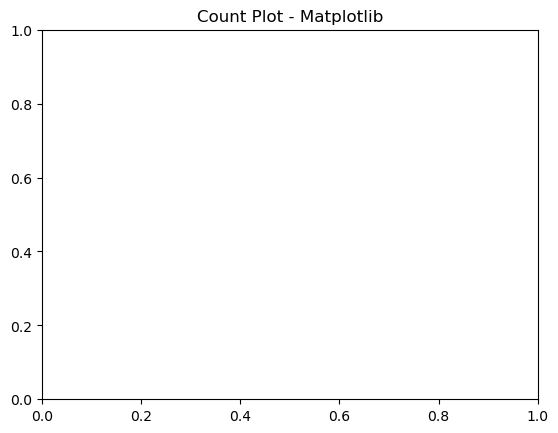

In [16]:
# Count Plot with Matplotlib

# Example placeholder - customize per chart type
# Replace with appropriate matplotlib code for Count Plot
plt.title("Count Plot - Matplotlib")
plt.show()


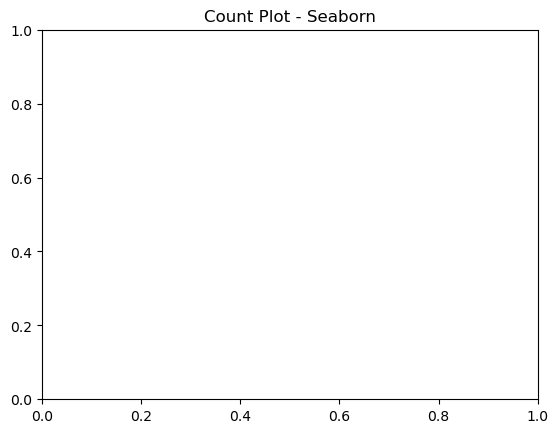

In [17]:
# Count Plot with Seaborn

# Replace with appropriate seaborn code for Count Plot
plt.title("Count Plot - Seaborn")
plt.show()


### Plotly

In [18]:
# Count Plot with Plotly Express
# Replace with appropriate plotly.express code for Count Plot
# e.g., px.bar(...), px.scatter(...)


## Box Plot
Box plots summarize distributions and highlight outliers.

It can be extra helpful to compare mutliple values, a grouped values.

### Matplotlib

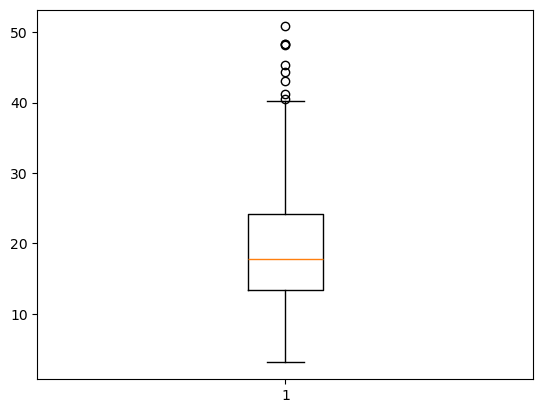

In [19]:
# Box Plot with Matplotlib
plt.boxplot(tips['total_bill']);

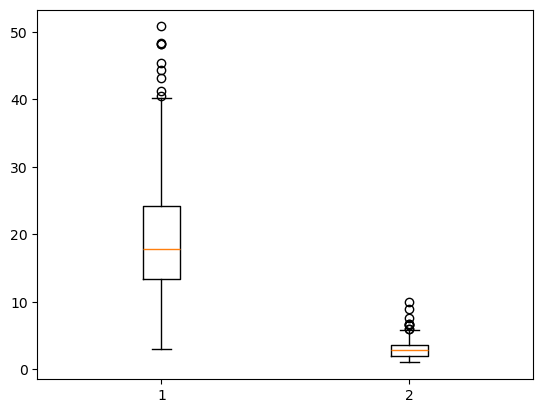

In [20]:
# Box Plot with Matplotlib
plt.boxplot(x=tips[['total_bill', 'tip']]);

### Seaborn

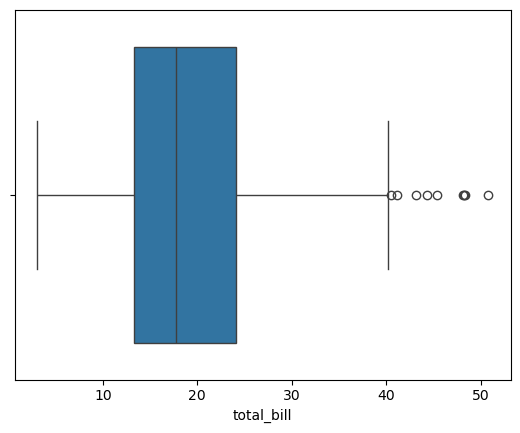

In [21]:
sns.boxplot(x='total_bill', data=tips);

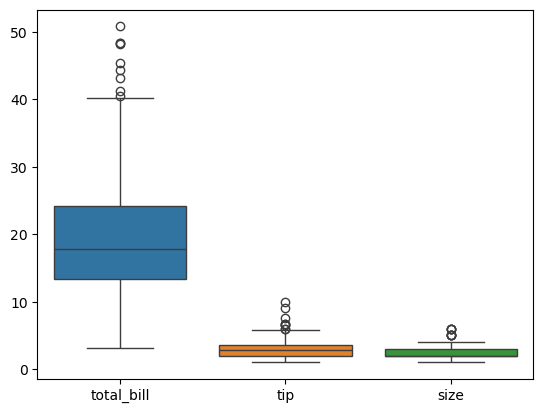

In [22]:
# Bonus Tip: Seaborn will plot all numerical columns in a wide data format if no x given
sns.boxplot(data=tips);

### Plotly

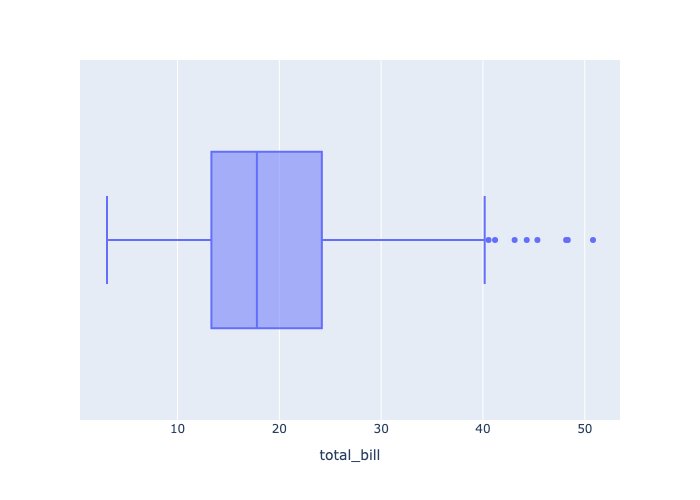

In [23]:
px.box(tips, x='total_bill')

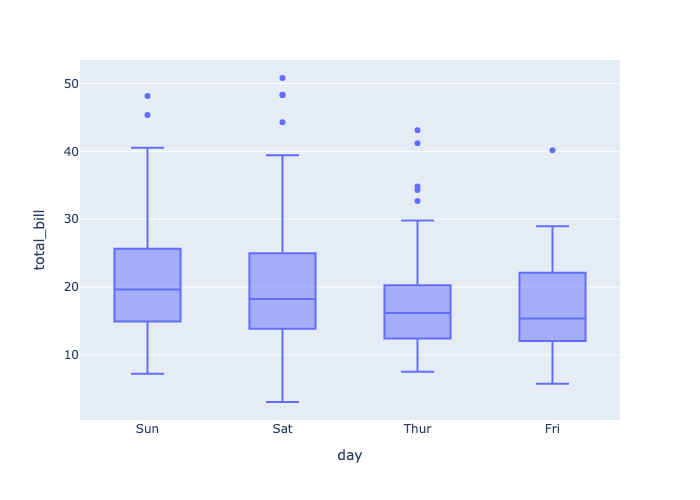

In [24]:
px.box(tips, x='day', y='total_bill')

## Violin Plot
Violin plots combine box plots with a KDE plot.

### Matplotlib

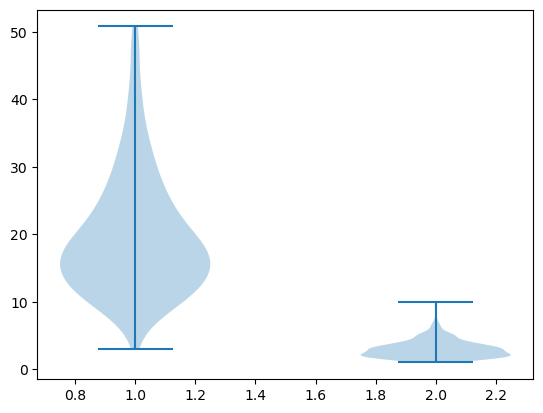

In [25]:
plt.violinplot(tips[['total_bill', 'tip']]);

### Seaborn

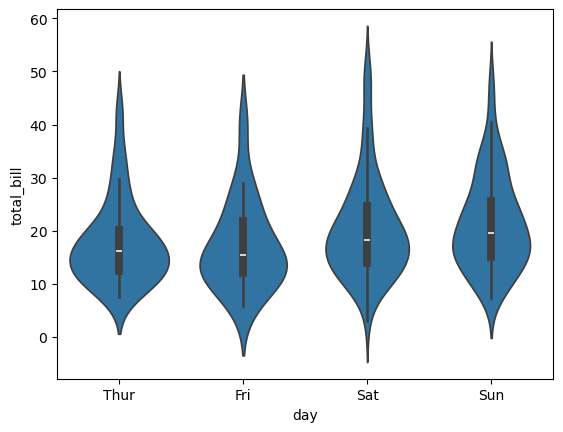

In [26]:
sns.violinplot(x='day', y='total_bill', data=tips);

### Plotly

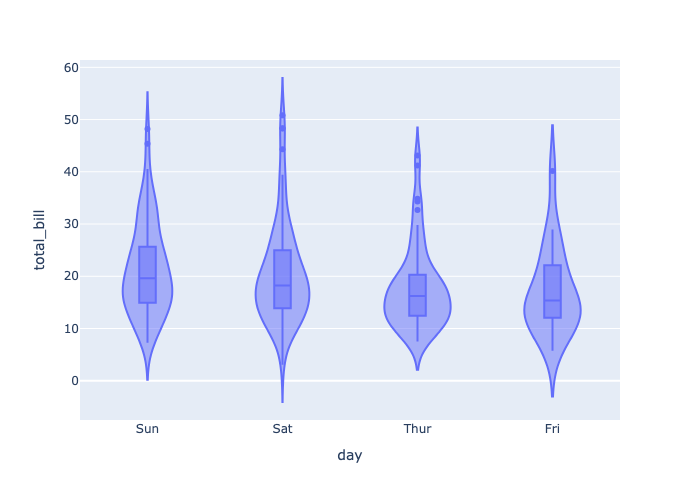

In [27]:
px.violin(tips, x='day', y='total_bill', box=True)

## Scatter Plot
Scatter plots show relationships between two numerical variables.

### Matplotlib

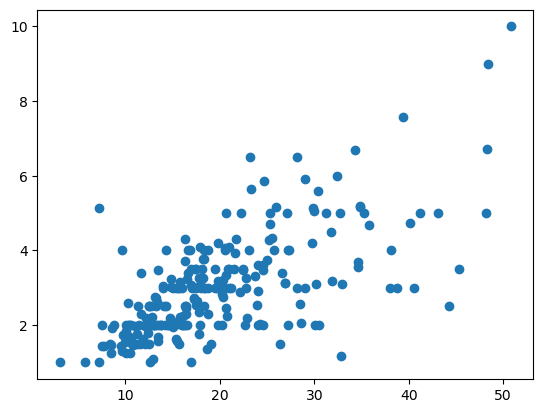

In [28]:
plt.scatter(tips['total_bill'], y=tips['tip'])

### Seaborn

<Axes: xlabel='total_bill', ylabel='tip'>

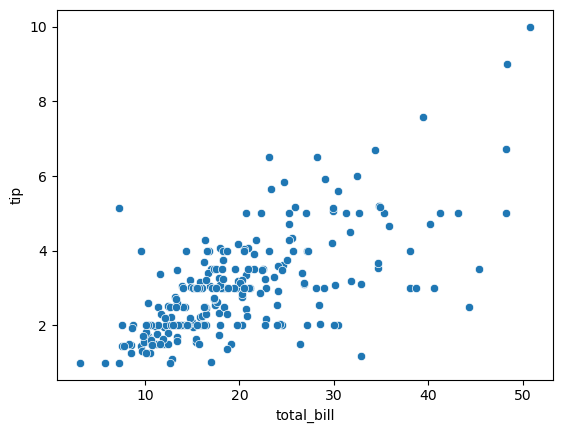

In [29]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

### Plotly

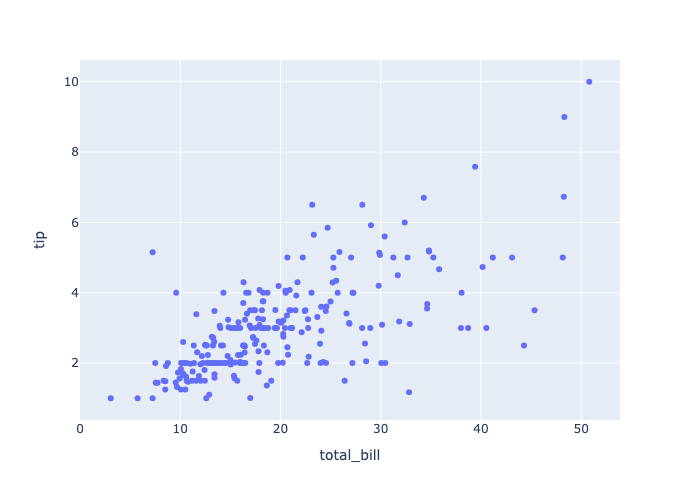

In [30]:
px.scatter(tips, x='total_bill', y='tip')

## Pie Chart

**Do NOT Use**

There are always much better, clearer ways to present data.